<a href="https://colab.research.google.com/github/emrllh/My_works/blob/main/Text_classification_with_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
"""
metadata: {
  "widgets": {
    "application/vnd.jupyter.widget-state+json": {
      "state": {}
    }
  }
}
"""

'\nmetadata: {\n  "widgets": {\n    "application/vnd.jupyter.widget-state+json": {\n      "state": {}\n    }\n  }\n}\n'

In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.7.0
    Uninstalling fsspec-2025.7.0:
      Successfully uninstalled fsspec-2025.7.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [ ]:
from IPython import get_ipython
from IPython.display import display
from datasets import load_dataset
from datasets import list_datasets

ImportError: cannot import name 'list_datasets' from 'datasets' (/usr/local/lib/python3.11/dist-packages/datasets/__init__.py)

In [ ]:
""""
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")
"""

'"\nfrom datasets import list_datasets\n\nall_datasets = list_datasets()\nprint(f"There are {len(all_datasets)} datasets currently available on the Hub")\nprint(f"The first 10 are: {all_datasets[:10]}")\n'

In [ ]:
from datasets import load_dataset

In [ ]:
#so let's load the emotion dataset with the load_dataset() function:
emotions = load_dataset('emotion')

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train_ds=emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

16000

In [ ]:
#access one of the training
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
train_ds.column_names

['text', 'label']

In [ ]:
#access training features
train_ds.features

{'text': Value('string'),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}

In [ ]:
train_ds['text'][:3], train_ds['label'][:3]


(['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 [0, 0, 3])

#### If The dataset in not on Hugging Face

In [ ]:
#  ! character in the preceding shell command, that’s because we’re running the commands in a Jupyter notebook.
# Simply remove the prefix if you want to download and unzip the dataset within a terminal.
#wget is a command-line utility for retrieving files from the web.
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
!wget {dataset_url}

--2025-07-12 18:38:20--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 3.163.189.37, 3.163.189.114, 3.163.189.90, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  6.56MB/s    in 0.2s    

2025-07-12 18:38:20 (6.56 MB/s) - ‘train.txt’ saved [1658616/1658616]



In [ ]:
! head -n 1 train.txt

i didnt feel humiliated;sadness


In [ ]:
#in case If My Dataset Is Not on the Hub?
emotions_local = load_dataset('csv', data_files='train.txt', sep=';',
                              names=['text','label'])

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
emotions_local

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
})

In [ ]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",
                               names=["text", "label"])

Generating train split: 0 examples [00:00, ? examples/s]

#### From Datasets to DataFrames

In [ ]:
#set_format() method that allows us to change the output format of the Dataset.
emotions.set_format('pandas')
df = emotions['train'][:]
df.head(5)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
# using the int2str() method

def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)


df['label_name'] = df['label'].apply(label_int2str)
df.head(5)

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
emotions['train'].features['label'].int2str([0,1,2,3,4])

['sadness', 'joy', 'love', 'anger', 'fear']

#### Looking at the Class Distribution

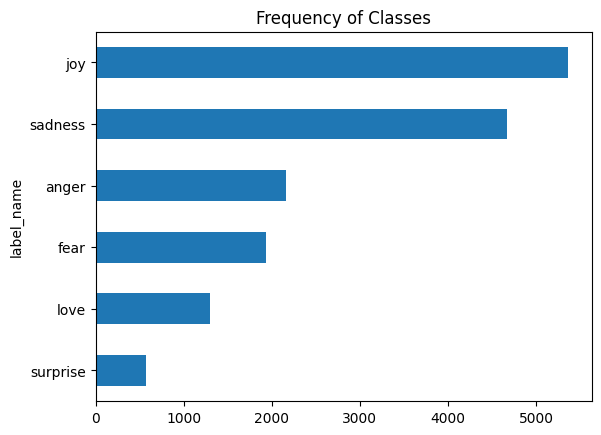

In [ ]:
import matplotlib.pyplot as plt
df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

#### How Long Are Our Tweets?

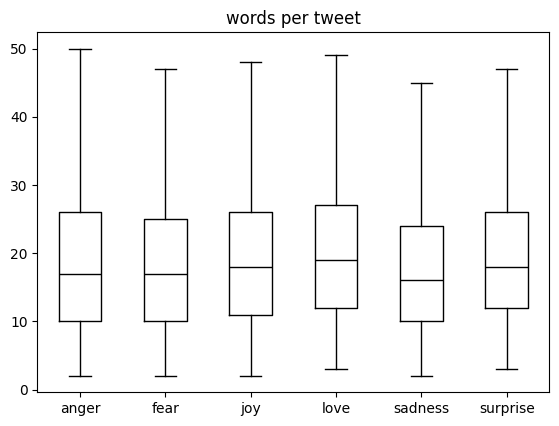

In [ ]:
# The most tweets are around 15 words long and the longest tweets
df['words per tweet'] =df['text'].str.split().apply(len)
df.boxplot('words per tweet', by='label_name', grid=False, showfliers=False,
           color='black')

plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
df['words per tweet'] =df['text'].str.split().apply(len)
df['words per tweet'][:4]

,words per tweet
0,4
1,21
2,10
3,18


In [ ]:
#reset the output format of our dataset since we don't need the DataFrame format anymore:
emotions.reset_format()

#### From Text to Tokens
##### Character Tokenization

In [ ]:
# Character Tokenition
text = "Tokenizing text is a core task of NLP."

tokonized_text = list(text)

print(tokonized_text)
print(sorted(set(tokonized_text)))


['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']
[' ', '.', 'L', 'N', 'P', 'T', 'a', 'c', 'e', 'f', 'g', 'i', 'k', 'n', 'o', 'r', 's', 't', 'x', 'z']


In [ ]:
#Change tokonized text to numbers
token2idx ={ch:idx for idx, ch in enumerate(sorted(set(tokonized_text)))}
print(token2idx)


{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [ ]:
for idx, ch in enumerate(sorted(set(tokonized_text))):
  print(idx,ch)


0  
1 .
2 L
3 N
4 P
5 T
6 a
7 c
8 e
9 f
10 g
11 i
12 k
13 n
14 o
15 r
16 s
17 t
18 x
19 z


In [ ]:
for token in tokonized_text:
  print(token)

T
o
k
e
n
i
z
i
n
g
 
t
e
x
t
 
i
s
 
a
 
c
o
r
e
 
t
a
s
k
 
o
f
 
N
L
P
.


In [ ]:
#We can now use token2idx to transform the tokenized text to a list of integers:
input_ids = [token2idx[token] for token in tokonized_text]
print(input_ids)
print(len(token2idx))

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]
20


In [ ]:
# Also panda has get_dummies function
import pandas as pd
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [ ]:
pd.get_dummies(categorical_df['Name'])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [ ]:
# converting input_ids to a tensor and applying the one_hot() function
import tensorflow as tf
one_hot_encodings = tf.one_hot(input_ids, depth=len(token2idx))
one_hot_encodings.shape

TensorShape([38, 20])

In [ ]:
one_hot_encodings[0]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

#### Word Tokenization

In [ ]:
#Word Tokenization
text = "Tokenizing text is a core task of NLP."
tokenized_text =text.split() # VS tokonized_text = list(text) for character tokenization
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


#### Subword Tokenization

The basic idea behind subword tokenization is to combine the best aspects of character and word tokenization. On the one hand, we want to split rare words into smaller units to allow the model to deal with complex words and misspellings. On the other hand, we want to keep frequent words as unique entities so that we can keep the length of our inputs to a manageable size. The main distinguishing feature of subword tokenization (as well as word tokenization) is that it is learned from the pretraining corpus using a mix of statistical rules and algorithms.

There are several subword tokenization algorithms that are commonly used in NLP, one of the main one is WordPiece which is used by the BERT and DistilBERT tokenizers.
https://huggingface.co/learn/llm-course/en/chapter6/6

In [ ]:
from transformers import AutoTokenizer #class that allows to quickly load the tokenizer associated with a pretrained model

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The AutoTokenizer class belongs to a larger set of "auto" classes whose job is to automatically retrieve the model's configuration, pretrained weights, or vocabulary from the name of the checkpoint. This allows you to quickly switch between models, but if you wish to load the specific class manually you can do so as well. For example, we could have loaded the DistilBERT tokenizer as follows:

In [ ]:
#https://huggingface.co/distilbert/distilbert-base-uncased

from transformers import DistilBertTokenizer


model_ckpt = "distilbert-base-uncased"
distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [ ]:
#see the tokenizer works
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
#convert text ids back to tokens
tokens= tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [ ]:
#With AutoTokenizer class we can see the vocab size
tokenizer.vocab_size

30522

In [ ]:
#model's maximum context size:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

#### Tokenizing the Whole Dataset

To tokenize the whole corpus, we'll use the `map()` method of our DatasetDict object

In [ ]:
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

In [ ]:
print(tokenize(emotions['train'][:2]))


{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


By default, the map() method operates individually on every example in the corpus, so setting batched=True will encode the tweets in batches. Because we've set batch_size=None, our tokenize() function will be applied on the full dataset as a single batch. This ensures that the input tensors and attention masks have the same shape globally

In [ ]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
#this operation has added new input_ids and attention_mask columns to the dataset:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


### Training a Text Classifier
We have two options to train such a model on our Twitter dataset

* Feature extraction:: We use the hidden states as features and just train a classifier on them, without modifying the pretrained model.
* Fine-tuning:: We train the whole model end-to-end, which also updates the parameters of the pretrained model.

#### Transformers as Feature Extractors
Using a transformer as a feature extractor is fairly simple.We freeze the body's weights during training and use the hidden states as features for the classifier. The advantage of this approach is that we can quickly train a small or shallow model. Such a model could be a neural classification layer or a method that does not rely on gradients, such as a random forest. This method is especially convenient if GPUs are unavailable, since the hidden states only need to be precomputed once.

In [ ]:
#Similar to the AutoTokenizer class, AutoModel has a from_pretrained() method to load the weights of a pretrained model.
from transformers import TFAutoModel
model_ckpt = "distilbert-base-uncased"
tf_model = TFAutoModel.from_pretrained(model_ckpt)

In [ ]:
#load pytorch model with from_pt=True

tf_xlmr =TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

#### Extracting the last hidden states

In [ ]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="tf")
print(f"Input tensor shape: {inputs['input_ids'].shape}") #[batch_size, n_tokens]

Input tensor shape: (1, 6)


In [ ]:
inputs.items()

ItemsView({'input_ids': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[ 101, 2023, 2003, 1037, 3231,  102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1]], dtype=int32)>})

In [ ]:
#. In our example, the model output is an instance of BaseModelOutput,
#and we can simply access its attributes by name. The current model returns only one attribute, which is the last hidden state,

outputs = tf_model(**inputs)
print(outputs)

TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 6, 768), dtype=float32, numpy=
array([[[-0.156513  , -0.18619648,  0.05277657, ..., -0.11881146,
          0.06620599,  0.54701537],
        [-0.35751373, -0.64835596, -0.06178996, ..., -0.3040193 ,
          0.3507687 ,  0.5220679 ],
        [-0.27718455, -0.44594473,  0.18184265, ..., -0.09477942,
         -0.0075747 ,  0.99582785],
        [-0.2840854 , -0.39167702,  0.37525555, ..., -0.21505722,
         -0.11725157,  1.0526478 ],
        [ 0.2660825 , -0.5093643 , -0.31801337, ..., -0.42029813,
          0.01444189, -0.21489501],
        [ 0.9440613 ,  0.01117259, -0.47139418, ...,  0.1439468 ,
         -0.7287832 , -0.16194937]]], dtype=float32)>, hidden_states=None, attentions=None)


In [ ]:
#[batch_size, n_tokens, hidden_dim]. In other words, a 768-dimensional vector is returned for each of the 6 input tokens
print(outputs.last_hidden_state.shape)

(1, 6, 768)


In [ ]:
outputs.last_hidden_state[:,0].shape

TensorShape([1, 768])

In [ ]:
#Now that we know how to get the last hidden state for a single string,
#let's do the same thing for the whole dataset by creating a new hidden_state column that stores all these vectors.

def extract_hidden_states(batch):
  inputs = {k: v for k, v in batch.items()
   if k in tokenizer.model_input_names}
  last_hidden_state =tf_model(**inputs).last_hidden_state
  return {'hidden_state':last_hidden_state[:,0].numpy()}

In [ ]:
for k, v in emotions_encoded.items():
  print(k,v)

train Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})
validation Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})
test Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 2000
})


In [ ]:
#The map() method requires the processing function to return Python or NumPy objects when we're using batched inputs
#Since our model expects tensors as inputs, the next thing to do is convert the input_ids and attention_mask columns to the "tensor" format

emotions_encoded.set_format(type='tensorflow',columns=["input_ids", "attention_mask", "label"])
emotions_encoded.set_format(type='pytorch',columns=["input_ids", "attention_mask", "label"])

In [ ]:
#Note that we did not set batch_size=None in this case, so the default batch_size=1000 is used instead
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

/usr/local/lib/python3.11/dist-packages/transformers/generation/tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# applying the +extract_​hid⁠den_​states()+ function has added a new hidden_state column to our dataset
emotions_hidden["train"].column_names, emotions_hidden["train"].shape

(['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'], (16000, 5))

In [ ]:
np.array(emotions_hidden["train"]['hidden_state']).shape

(16000, 768)

In [ ]:
emotions_hidden["validation"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [ ]:
emotions_hidden["test"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

#### Creating a feature matrix

In [ ]:
#We will use the hidden states as input features and the labels as targets.
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_state'])
X_valid = np.array(emotions_hidden['validation']['hidden_state'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])
X_train.shape, X_valid.shape
#X_train[0]

array([-1.16751224e-01,  9.85713303e-02, -1.29629329e-01, -9.50178057e-02,
       -2.80834109e-01, -1.32215336e-01,  2.27481723e-01,  2.31003076e-01,
        1.67523235e-01, -2.46626347e-01,  2.17547789e-02, -1.02000386e-01,
       -1.80978999e-01,  2.23511040e-01,  2.02753231e-01,  1.16930328e-01,
       -6.95280731e-04,  1.20253265e-01, -1.42729841e-04, -6.07428588e-02,
       -1.43815845e-01, -3.12014312e-01, -1.08771756e-01,  1.18215419e-01,
       -7.39391297e-02,  7.26351440e-02,  2.13192239e-01, -2.95695990e-01,
        1.04322463e-01, -1.49795711e-01,  1.19127110e-01,  1.35586232e-01,
       -2.05119282e-01,  7.99822807e-02, -1.23400323e-01,  2.49953009e-02,
        1.19481757e-02,  1.00902207e-02,  1.37400001e-01, -1.34400353e-02,
       -1.12659439e-01, -7.76464641e-02, -1.30066976e-01, -7.16874525e-02,
        8.52977633e-02, -5.47505580e-02, -2.18809700e+00, -5.04678488e-02,
       -3.22110564e-01, -1.62445456e-01,  3.16997081e-01, -1.95755124e-01,
        1.32156581e-01,  

### Visualizing the training set

In [ ]:
#Since visualizing the hidden states in 768 dimensions is tricky to say the least, we'll use the powerful UMAP for dimention reduction
#!pip install umap-learn
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
#print(X_scaled[0])

# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)

# Create a DataFrame of 2D embeddings
#mapper.embedding_ holds the resulting 2-dimensional coordinates for each data point from original X_scaled data.
df_emb = pd.DataFrame(mapper.embedding_, columns=['X','Y'])
df_emb['label'] = y_train
df_emb.head()


,X,Y,label
0,4.211453,2.882973,0
1,-3.313645,3.659170,0
2,5.099002,6.234859,3
3,-2.855970,5.877140,2
4,-3.389970,5.639140,3


In [ ]:
mapper.embedding_, mapper.embedding_.shape

(array([[ 4.211453 ,  2.882973 ],
        [-3.3136446,  3.65917  ],
        [ 5.0990024,  6.234859 ],
        ...,
        [-2.722556 ,  6.283382 ],
        [ 5.042961 ,  5.806988 ],
        [-2.3993976,  3.9279974]], dtype=float32),
 (16000, 2))

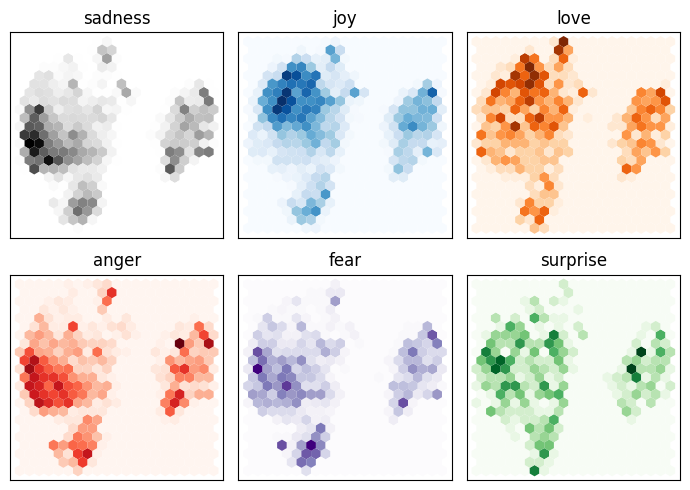

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,3, figsize=(7,5))
axes = axes.flatten()
cmaps =["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions['train'].features['label'].names
#labels
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

 #### Training a simple classifier

 The model was not trained to know the difference between these emotions. It only learned them implicitly by guessing the masked words in texts.

In [ ]:
#Let's use these hidden states to train a logistic regression model with Scikit-Learn. Training such a simple model is fast and does not require a GPU:

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
lr_clf.score(X_valid,y_valid)

0.6345

Looking at the accuracy, it might appear that our model is just a bit better than random—but since we are dealing with an unbalanced multiclass dataset, it's actually significantly better. We can examine whether our model is any good by comparing it against a simple baseline. In Scikit-Learn there is a DummyClassifier that can be used to build a classifier with simple heuristics such as always choosing the majority class or always drawing a random class. In this case the best-performing heuristic is to always choose the most frequent class, which yields an accuracy of about 35%:

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy= 'most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

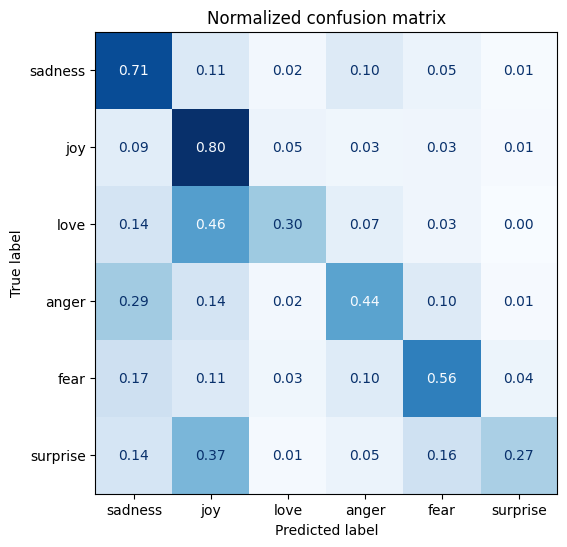

In [ ]:
#We can further investigate the performance of the model by looking at the confusion matrix of the classifier
#which tells us the relationship between the true and predicted labels:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

# Confussions : Love and surprise VS Joy(0.46, 0.37), Fear and Anger VS Sadness(0.17, 0.29)

### Fine-Tuning Transformers

We'll be using the Trainer API from Transformers to simplify the training loop.

We use the `AutoModelForSequenceClassification` model instead of `AutoModel`. The difference is that the `AutoModelForSequenceClassification` model has a classification head on top of the pretrained model outputs, which can be easily trained with the base model

In [ ]:
emotions_encoded.set_format(type='torch',columns=["text","input_ids", "attention_mask", "label"])
emotions_encoded["train"].column_names

['text', 'label', 'input_ids', 'attention_mask']

In [ ]:
#select the model
import torch

from transformers import AutoModelForSequenceClassification
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_ckpt = "distilbert-base-uncased"

num_labels =6
pt_model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

In [ ]:
# The next step is to define the metrics that we'll use to evaluate our model's performance during fine-tuning.
from sklearn.metrics import accuracy_score,f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return{'accuracy' : acc, 'f1' : f1}

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size =64
logging_steps = len(emotions_encoded['train']) // batch_size #250
model_name = f'{model_ckpt}-finetuned-emotion'
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                 eval_strategy='epoch',
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level='error')


In [ ]:
print(len(emotions_encoded['train']))
logging_steps = len(emotions_encoded['train']) // batch_size
print(logging_steps)

16000
250


In [ ]:
emotions_encoded['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

In [ ]:
from transformers import Trainer

trainer = Trainer(model=pt_model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  processing_class=tokenizer)
trainer.train();


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: d-analyst-emrllh (d-analyst-emrllh-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.812500,0.299703,0.915000,0.914523
2,0.245600,0.215115,0.926000,0.926013


In [ ]:
#saving the model
trainer.save_model('pt_model')

events.out.tfevents.1753219103.88f5663098d9.837.0:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

In [ ]:
#load saving model


We can take a more detailed look at the training metrics by calculating the confusion matrix. To visualize the confusion matrix, we first need to get the predictions on the validation set. The predict() method of the Trainer class returns several useful objects we can use for evaluation:

In [ ]:
preds_output = trainer.predict(emotions_encoded['validation'])
preds_output.metrics

{'test_loss': 0.21511536836624146,
 'test_accuracy': 0.926,
 'test_f1': 0.926012777423995,
 'test_runtime': 3.7862,
 'test_samples_per_second': 528.231,
 'test_steps_per_second': 8.452}

#### With Keras

 Next, we'll convert our datasets into the tf.data.Dataset format. Since we have already padded our tokenized inputs, we can do this easily by applying the to_tf_dataset() method to emotions_encoded:

In [ ]:
## The column names to convert to TensorFlow tensors
tekonizer_columns = tokenizer.model_input_names
tekonizer_columns

['input_ids', 'attention_mask']

In [ ]:
tf_train_dataset = emotions_encoded['train'].to_tf_dataset(columns=tekonizer_columns, label_cols=['label'], shuffle=True,
                                                           batch_size=batch_size)

tf_eval_dataset = emotions_encoded['validation'].to_tf_dataset(columns=tekonizer_columns, label_cols=['label'], shuffle=False,
                                                               batch_size=batch_size)

/usr/local/lib/python3.11/dist-packages/datasets/arrow_dataset.py:405: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
tf_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=tf.metrics.SparseCategoricalAccuracy())

In [ ]:
tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

Epoch 1/2
250/250 [==============================] - 185s 552ms/step - loss: 0.5263 - sparse_categorical_accuracy: 0.8181 - val_loss: 0.1763 - val_sparse_categorical_accuracy: 0.9280
Epoch 2/2
250/250 [==============================] - 135s 539ms/step - loss: 0.1456 - sparse_categorical_accuracy: 0.9391 - val_loss: 0.1419 - val_sparse_categorical_accuracy: 0.9400


In [ ]:
tf_model.history.history

{'loss': [0.5263211131095886, 0.14562678337097168],
 'sparse_categorical_accuracy': [0.8180624842643738, 0.9391250014305115],
 'val_loss': [0.17626215517520905, 0.14186713099479675],
 'val_sparse_categorical_accuracy': [0.9279999732971191, 0.9399999976158142]}

In [ ]:
preds_output = tf_model.predict(emotions_encoded["validation"])

ValueError: Failed to find data adapter that can handle input: <class 'datasets.arrow_dataset.Dataset'>, <class 'NoneType'>

In [ ]:
tf_model.evaluate(tf_eval_dataset)

32/32 [==============================] - 5s 146ms/step - loss: 0.1419 - sparse_categorical_accuracy: 0.9400


[0.14186713099479675, 0.9399999976158142]

In [ ]:
model.save_pretrained('tf_model')

In [ ]:
#hide_output
repo_id = "tfmodel"
tf_model.push_to_hub(repo_id=repo_id, commit_message="Training completed!")


tf_model.h5:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import torch

# Assuming 'pt_model' is your PyTorch model instance
# Replace 'path/to/your/model.pth' with the desired file path
save_path = 'path/to/your/model.pth'
torch.save(pt_model.state_dict(), save_path)

print(f"Model saved to {save_path}")